In [1]:
from fastcore.all import *
from fastai.vision.all import *
from duckduckgo_search import ddg_images
from time import sleep

In [2]:
def serch_images(keyword,max_images=60):
    print(f'downloading {keyword}')
    return L(ddg_images(keywords=keyword,max_results=max_images)).itemgot('image')

In [57]:
from fastdownload import download_url
searches=['single person with beard','person without beard']
path=Path('Beard_or_not')
for s in searches:
    dest=path/s
    dest.mkdir(exist_ok=True,parents=True)
    download_images(urls=serch_images(f'{s} image'),dest=dest)
    sleep(2)
    resize_images(path/s,max_size=400,dest=path/s)

downloading single person with beard image


/Volumes/TAPPS/DS_APPS/anaconda3/envs/tensorflow/lib/python3.9/site-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/Volumes/TAPPS/DS_APPS/anaconda3/envs/tensorflow/lib/python3.9/site-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/Volumes/TAPPS/DS_APPS/anaconda3/envs/tensorflow/lib/python3.9/site-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


downloading person without beard image


In [59]:
failed=verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)


0

In [5]:
path=Path('Beard_or_not')
dls=DataBlock(
        blocks=(ImageBlock,CategoryBlock),
        get_items=get_image_files,
        splitter=RandomSplitter(valid_pct=0.2,seed=42),
        item_tfms=Resize(128),
        get_y=parent_label
    ).dataloaders(path)

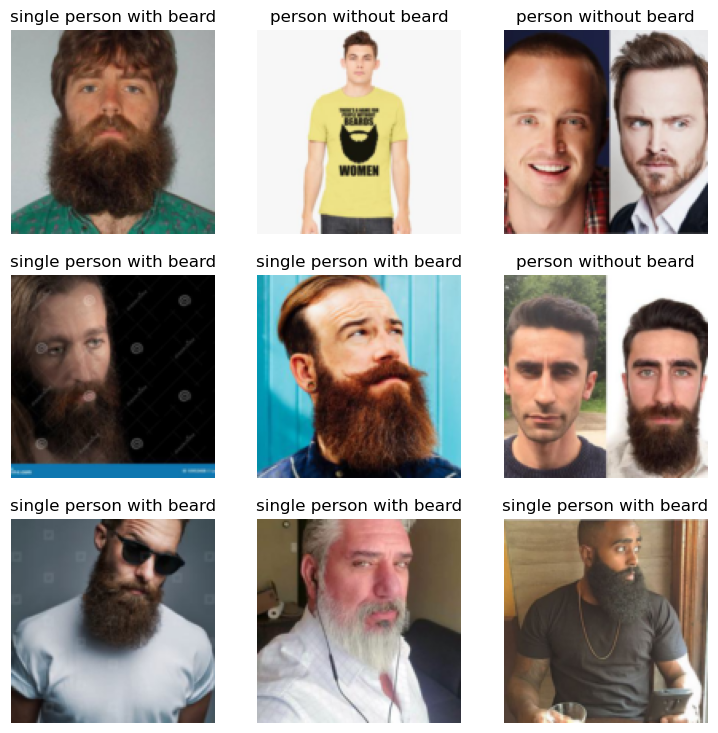

In [61]:
dls.valid.show_batch()

In [6]:
learner=vision_learner(dls,resnet18,metrics=error_rate)
learner.fine_tune(4)

/Volumes/TAPPS/DS_APPS/anaconda3/envs/tensorflow/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Volumes/TAPPS/DS_APPS/anaconda3/envs/tensorflow/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.201292,2.301545,0.400000,00:01


epoch,train_loss,valid_loss,error_rate,time
0,1.225428,1.904871,0.400000,00:00
1,1.070020,1.316979,0.400000,00:00
2,0.906802,0.985399,0.350000,00:00
3,0.718462,0.831061,0.300000,00:00


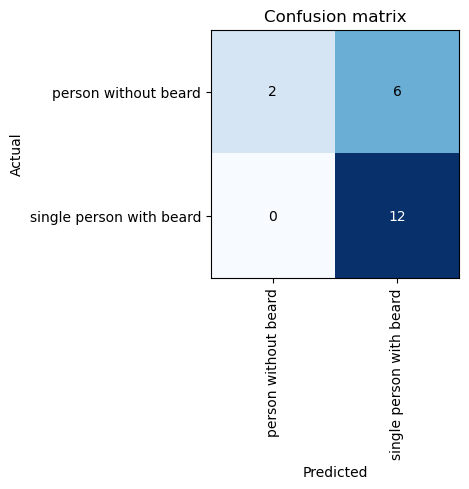

In [7]:
interp=ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix()

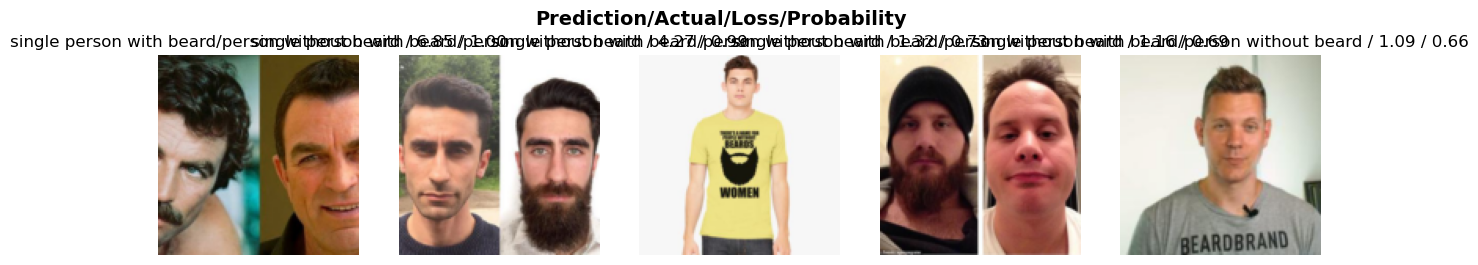

In [8]:
interp.plot_top_losses(5,nrows=1)

In [9]:
from fastai.vision.widgets import *
cleaner=ImageClassifierCleaner(learner)
cleaner

In [10]:
for idx in cleaner.delete():
    cleaner.fns[idx].unlink()
for idx,cat in cleaner.change():
    shutil.move(str(cleaner.fns[idx]),path/cat)

In [42]:
btn=widgets.FileUpload()
btn

FileUpload(value=(), description='Upload')

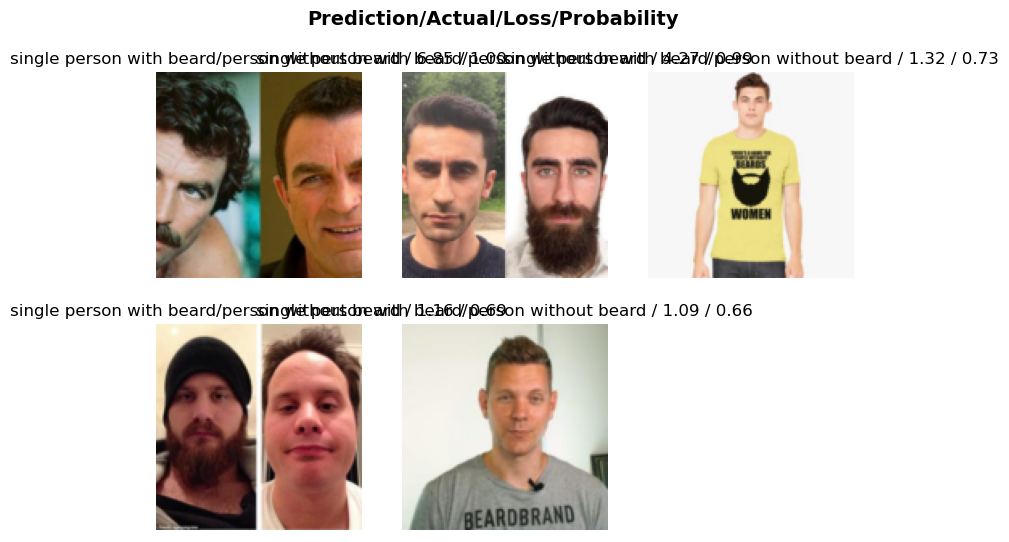

In [41]:
interp.plot_top_losses(5)

In [44]:
print(btn.data[0])

AttributeError: 'FileUpload' object has no attribute 'data'